In [1]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")
include(pathtorepo * "dynamical-systems\\visual_regimes.jl");

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`


In [2]:
using StaticArrays, DifferentialEquations, DynamicalSystems
E, x, y  = -40..40, -5..5,  -5..5
box = E × x × y
using CairoMakie, GLMakie
using LinearAlgebra

In [3]:
const τ = 0.013;  const τD = 0.07993;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305; 

In [4]:
time = 1000; tt = 1000; tstep = 0.001; times = [time, tt]
integ_set = (alg = Vern9(), adaptive = false, dt = tstep);

In [5]:
I0 = -1.7071205330241375; U0 = 0.26506094791239404
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0_1 = [8.421422866701183, 0.7359215519694303, 0.43895581827508423] # SA[8.054797242493304, 0.7437113804461553, 0.4383355523705589];

3-element Vector{Float64}:
 8.421422866701183
 0.7359215519694303
 0.43895581827508423

In [6]:
ds = CoupledODEs(TM, u0_1, p, diffeq = integ_set)

3-dimensional CoupledODEs
 deterministic: true
 discrete time: false
 in-place:      false
 dynamic rule:  TM
 ODE solver:    Vern9
 ODE kwargs:    (adaptive = false, dt = 0.001)
 parameters:    [1.58, 0.013, 0.07993, 3.3, 3.07, 0.75, 0.4, 0.26506094791239404, 0.305, 0.3, -1.7071205330241375]
 time:          0.0
 state:         [8.421422866701183, 0.7359215519694303, 0.43895581827508423]


In [7]:
fp, ei, _ = fixedpoints(ds, box, jacob_TM_);

In [8]:
prob_for = ODEProblem(TM, u0_1, (0.0, 1000), p)
sol_for = solve(prob_for, alg = Vern9(), adaptive = false, dt = 0.001); 

In [9]:
println("Length: $(length(sol_for))")
println("Last point: $(sol_for[end])")

Length: 1000002
Last point: [9.205083812121998, 0.7118046470973897, 0.553017678246954]


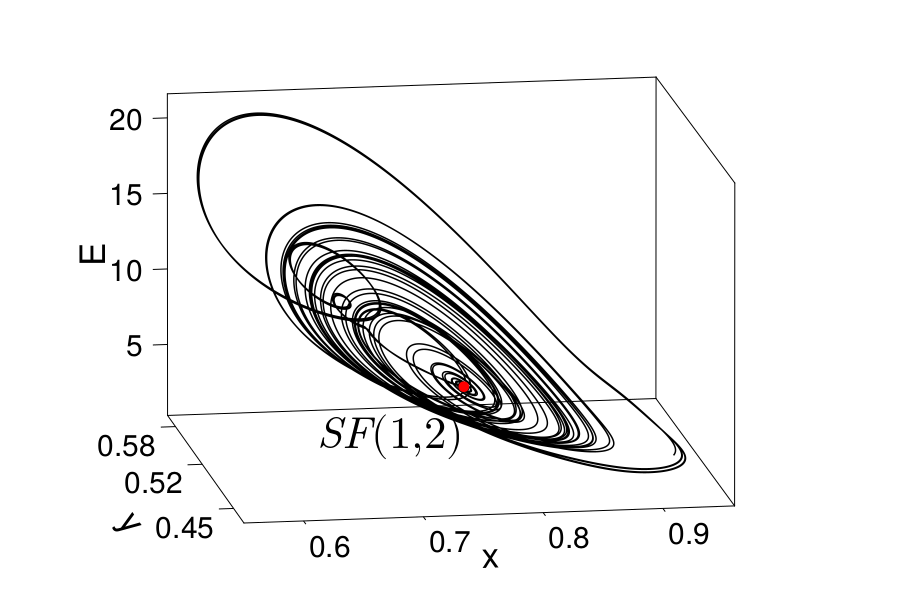

CairoMakie.Screen{IMAGE}


In [10]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.55pi, elevation = 0.07pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz,
            yticks = [0.45, 0.52, 0.58])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

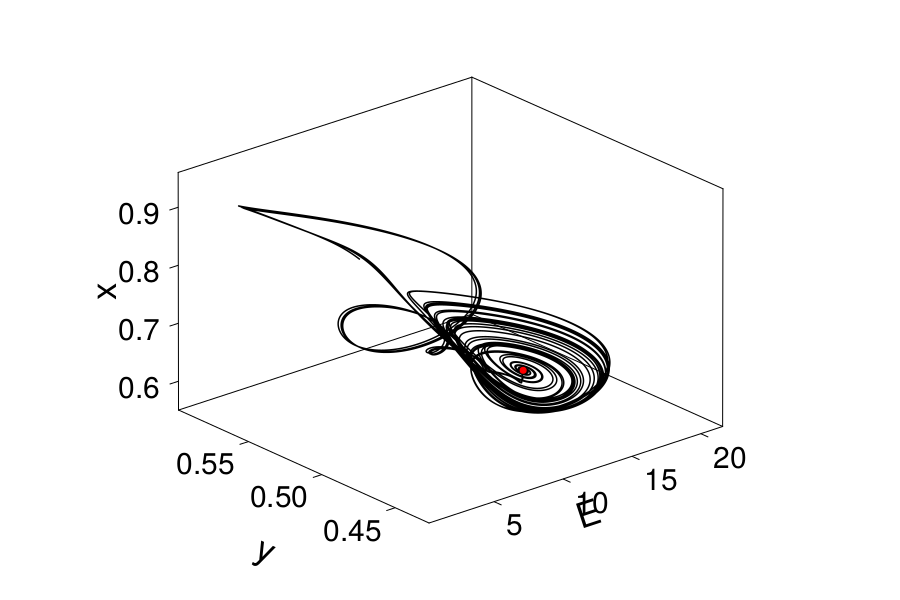

CairoMakie.Screen{IMAGE}


In [11]:
ts, tf = 960000, 994000
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 20;
disy = 70;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1],
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    #text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:right, :top), offset = (0, -25))
end

display(f)

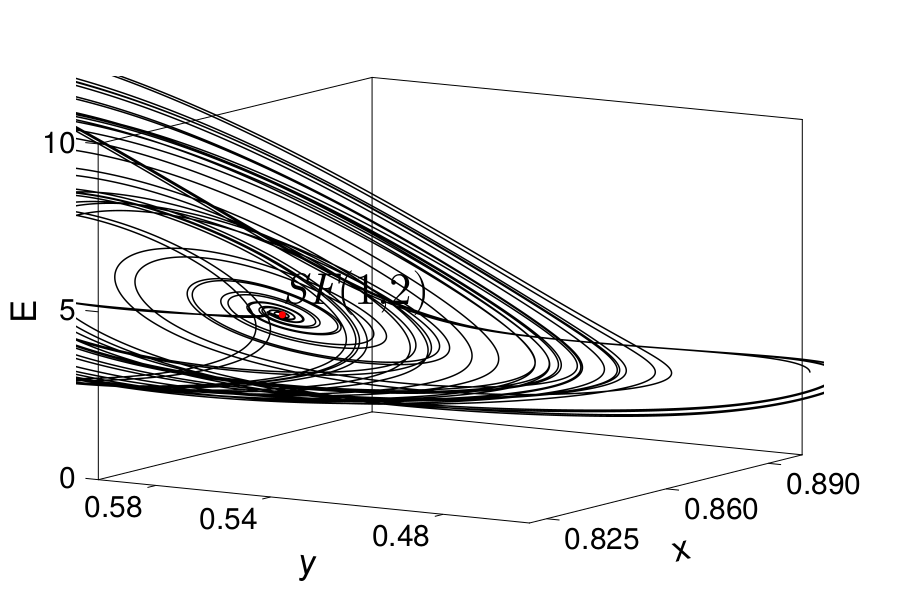

CairoMakie.Screen{IMAGE}


In [12]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 40;
disy = 40;
disz = 55;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = -0.82pi, elevation = 0.05pi,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz, xticks = [0.825, 0.86, 0.89], yticks = [0.48, 0.54, 0.58])

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end


xlims!(0.82,0.9)
ylims!(0.45, 0.6)
zlims!(0, 10)

display(f)

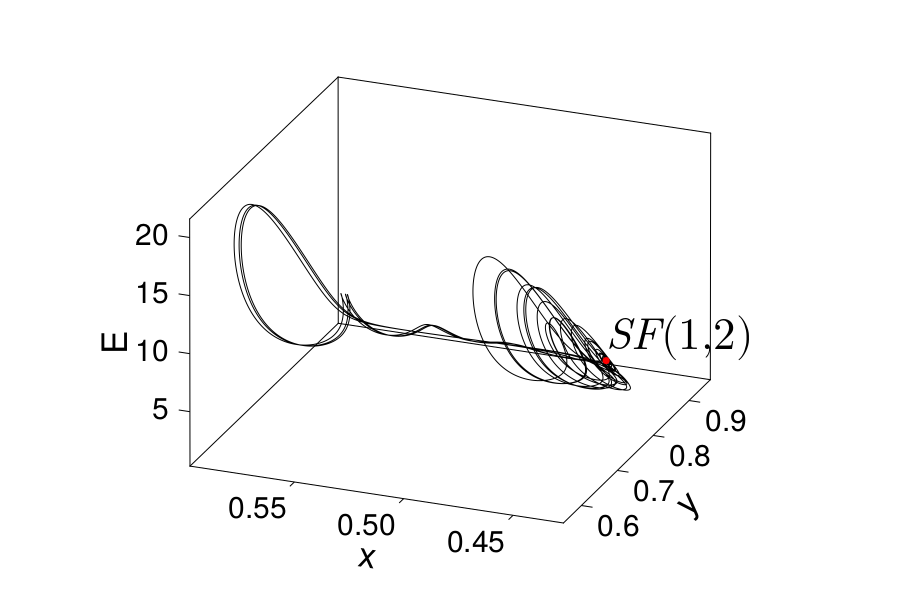

CairoMakie.Screen{IMAGE}


In [13]:
idx, idy, idz = 2, 3, 1
az = 1.12pi;
ts, tf = 960000, 980000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!()

f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "y", ylabel = "x", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 10)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

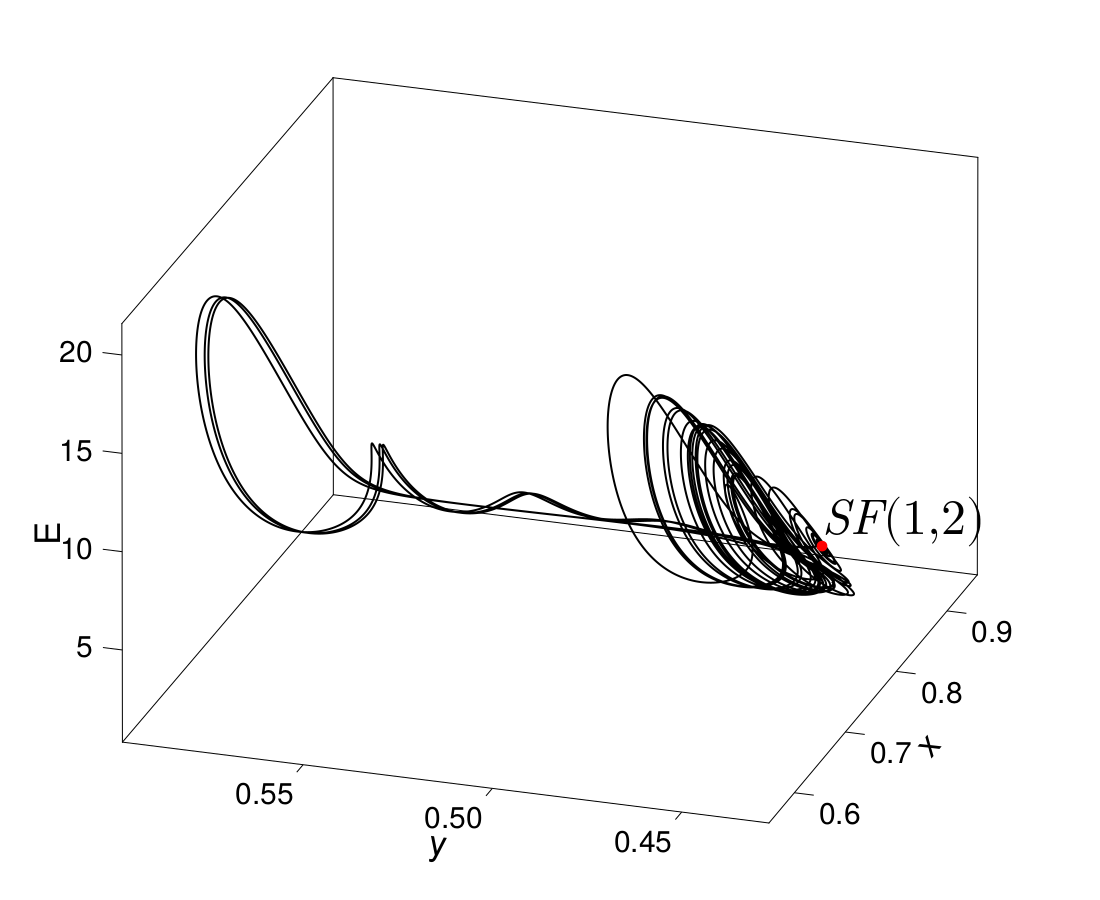

CairoMakie.Screen{IMAGE}


In [17]:
idx, idy, idz = 2, 3, 1
az = 1.1pi;
ts, tf = 960000, 985000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!(type = "svg", antialias = :best)

f = Figure(resolution = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az,
            xlabel = "x", ylabel = "y", zlabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

#ax = LScene(f[1, 1])
#scale!(ax.scene, 1, 50, 50)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 2.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 15)
    text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 50, color = :black, align = (:left, :bottom))
end

#hidespines!(ax)
#hidedecorations!(ax)

#zlims!(0.0, 10.0)
#xlims!(0.5, 0.8)
#ylims!(0.4, 0.5)

display(f)

In [19]:
save("chaotic_homoclinic_phase.eps", f)

CairoMakie.Screen{EPS}


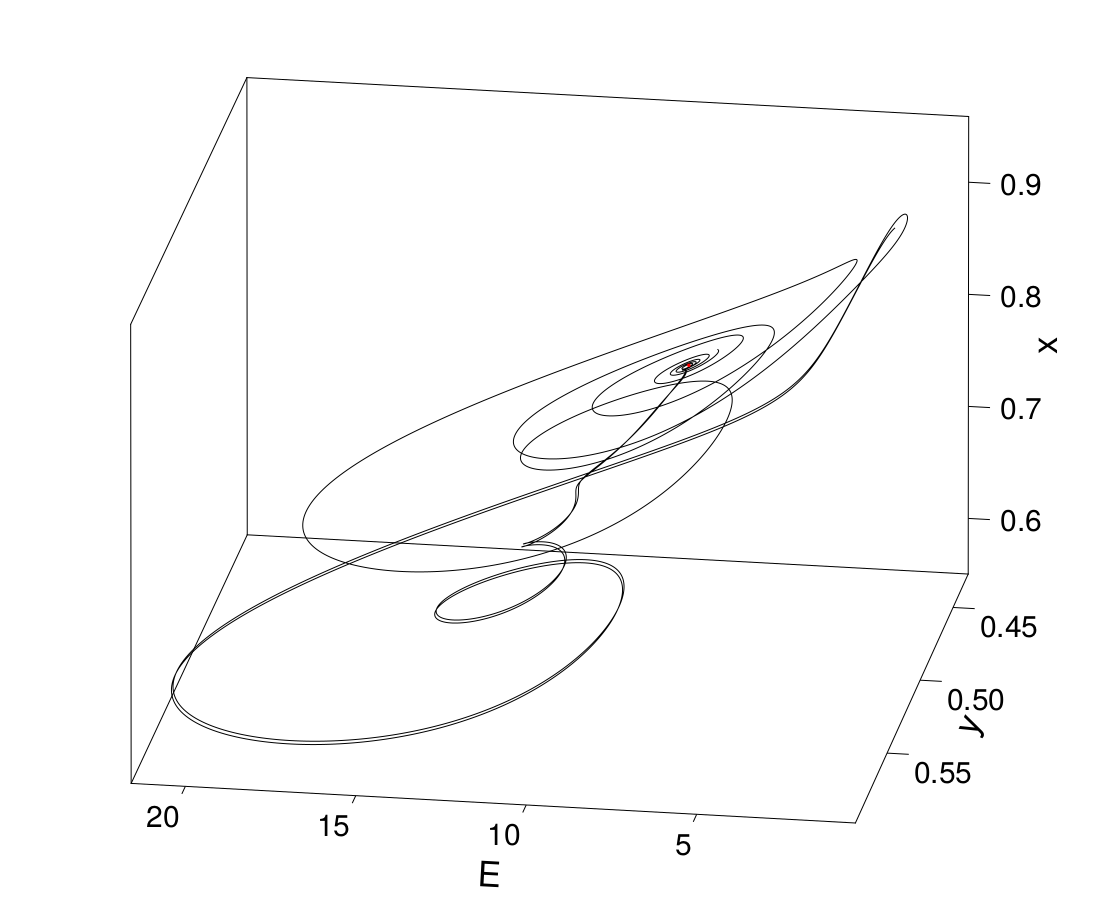

CairoMakie.Screen{IMAGE}


In [15]:
elevat = 0.35;
az = 0.55pi;
idx, idy, idz = 1, 3, 2
ts, tf = 960000, 970000
lb_size = 35; tck_size = 30;
prot = 60;
disx  = 50;
disy = 40;
disz = 55;

# azimuth = -0.32pi, elevation = 0.1pi
CairoMakie.activate!()

f = Figure(resolution = (1100, 900))
ax = Axis3(f[1, 1], azimuth = az, elevation = elevat,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = prot, xlabeloffset = disx, ylabeloffset = disy, zlabeloffset = disz)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.0, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :red, markersize = 5)
    #text!(ep[idx], ep[idy], ep[idz],text = L"SF(1,2)", fontsize = 45, color = :black, align = (:left, :bottom))
end

display(f)

In [69]:
ts, tf = 960000, 994000
idx, idy, idz = 2, 3, 1
lb_size = 35; tck_size = 30;
dis  = 60;

GLMakie.activate!()
f = Figure(resolution = (600, 600))
ax = LScene(f[1, 1])
scale!(ax.scene, 50, 50, 1)

lines!(sol_for[idx,ts:tf], sol_for[idy,ts:tf], sol_for[idz,ts:tf],
    linewidth = 1.5, color = :black)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 8)
end

display(GLMakie.Screen(), f)

GLMakie.Screen(...)

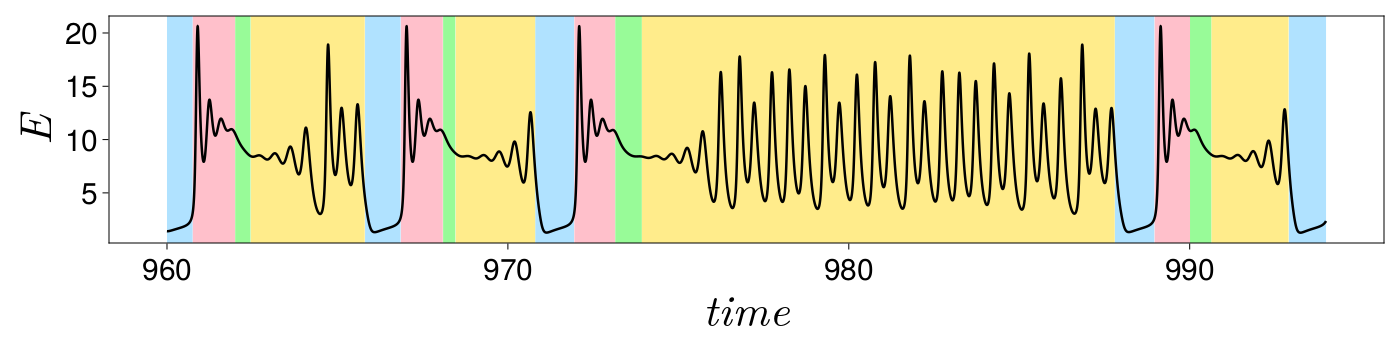

In [16]:
ts, tf = 960000, 994000 #165000, 200000 #500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(resolution = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

#:thistle1)
# mistyrose

bluest = [960, 965.81, 970.801, 987.801, 992.91]
bluend = [960.75, 966.85, 971.94, 988.96, 994]

pinkst = [960.751, 966.86, 971.95, 988.97]
pinkend = [962.0, 968.09, 973.15, 990.2]

ph3st = [962.001, 968.1, 973.151, 990.01]
ph3end = [962.45, 968.46, 973.93, 990.64]

ph4st = [962.46, 968.47, 973.931, 990.641]
ph4end = [965.8, 970.8, 987.8, 992.9]

vspan!(pinkst, pinkend, color = :pink)
vspan!(bluest, bluend, color = :lightskyblue1)
vspan!(ph3st, ph3end, color = :palegreen)#honeydew2)
vspan!(ph4st, ph4end, color = :lightgoldenrod1)

lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)
f

In [22]:
save("chaotic_homoclinic_timeseries.eps", f)

CairoMakie.Screen{EPS}


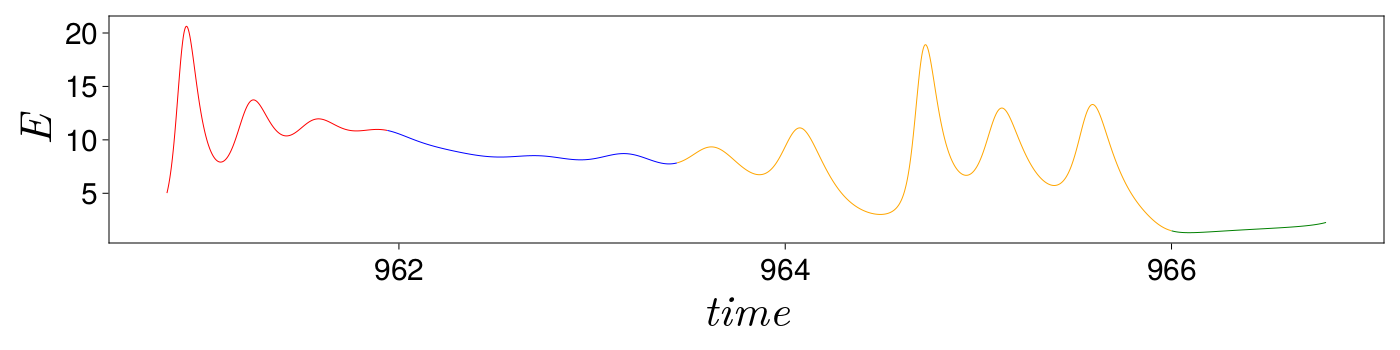

In [78]:
ts, tf = 960800, 967000 #165000, 200000 #500000, 580000

lb_size = 45; tck_size = 30;
CairoMakie.activate!()
f = Figure(resolution = (1400, 350))
axis = Axis(f[1, 1], xlabel = L"$time$", ylabel = L"$E$",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)

#lines!(axis, sol_for.t[ts:tf], sol_for[1, ts:tf], linewidth = 2.5, color = :black)

ph1ts, ph1ted = 960800, 961940
ph2ts, ph2ed = 961941, 963440
ph3ts, ph3ed = 963441, 966000
ph4ts, ph4ed = 966001, 966801

lines!(axis, sol_for.t[ph1ts:ph1ted], sol_for[1, ph1ts:ph1ted], linewidth = 1.0, color = :red)
lines!(axis, sol_for.t[ph2ts:ph2ed], sol_for[1, ph2ts:ph2ed], linewidth = 1.0, color = :blue)
lines!(axis, sol_for.t[ph3ts:ph3ed], sol_for[1, ph3ts:ph3ed], linewidth = 1.0, color = :orange)
lines!(axis, sol_for.t[ph4ts:ph4ed], sol_for[1, ph4ts:ph4ed], linewidth = 1.0, color = :green)
f

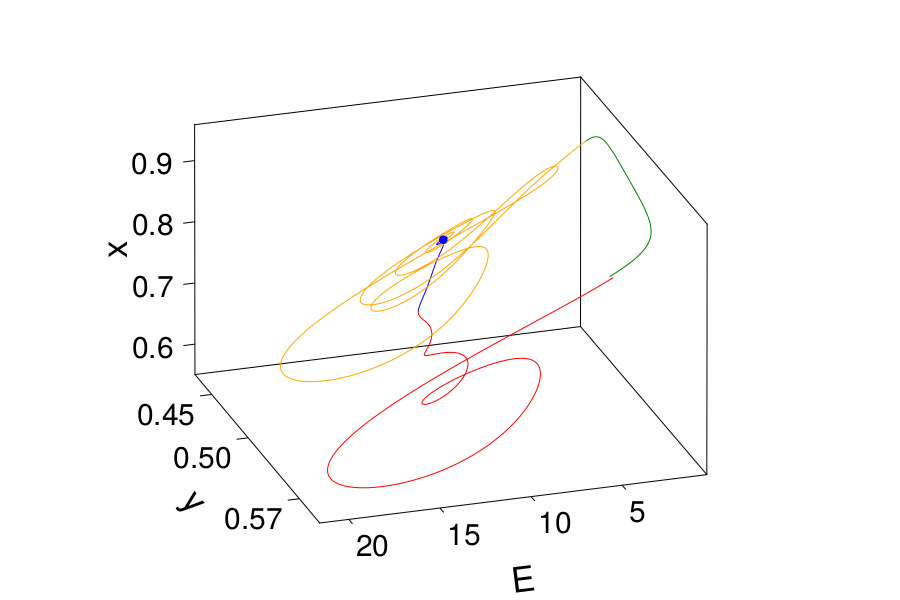

CairoMakie.Screen{IMAGE}


In [101]:
idx, idy, idz = 1, 3, 2
lb_size = 35; tck_size = 30;
dis  = 60;

CairoMakie.activate!()
f = Figure(resolution = (900, 600))
ax = Axis3(f[1, 1], azimuth = 0.4pi,
            xlabel = "E", ylabel = "y", zlabel = "x",
            xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false, zgridvisible = false,
            protrusions = dis, xlabeloffset = dis, ylabeloffset = dis, zlabeloffset = dis,
            yticks = [0.45, 0.50, 0.57])


ph1ts, ph1ted = 960800, 961940
ph2ts, ph2ted = 961941, 963300
ph3ts, ph3ted = 963301, 966000
ph4ts, ph4ted = 966001, 966930

lines!(sol_for[idx,ph1ts:ph1ted], sol_for[idy,ph1ts:ph1ted], sol_for[idz,ph1ts:ph1ted], linewidth = 1.0, color = :red)
lines!(sol_for[idx,ph2ts:ph2ted], sol_for[idy,ph2ts:ph2ted], sol_for[idz,ph2ts:ph2ted], linewidth = 1.0, color = :blue)
lines!(sol_for[idx,ph3ts:ph3ted], sol_for[idy,ph3ts:ph3ted], sol_for[idz,ph3ts:ph3ted], linewidth = 1.0, color = :orange)
lines!(sol_for[idx,ph4ts:ph4ted], sol_for[idy,ph4ts:ph4ted], sol_for[idz,ph4ts:ph4ted], linewidth = 1.0, color = :green)

for (i, ep) in enumerate(fp)
    scatter!(ep[idx], ep[idy], ep[idz], color = :blue, markersize = 12)
end

display(f)